## Linear Regression Example 2 : PyTorch

In [218]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [219]:
np.random.seed(0)

### Step 1. Data

In [220]:
def make_random_data():
    x = np.random.uniform(low=-2, high=2, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, scale=(0.5 + t*t/3), size=None)
        y.append(r)
    return  x, 1.726*x -0.84 + np.array(y)

### Plot the data

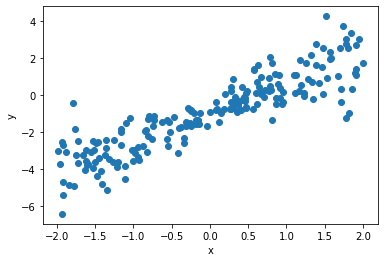

In [221]:
x, y = make_random_data() 

plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Train/Test data

In [222]:
epoch=100
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train)
x_test = torch.Tensor(x_test)
y_test = torch.Tensor(y_test)

In [223]:
x_train = torch.unsqueeze(x_train, dim=1)
y_train = torch.unsqueeze(y_train, dim=1)

print(x_train.dim(), x_train.shape, y_train.dim(), y_train.shape)

x_test = torch.unsqueeze(x_test, dim=1)
y_test = torch.unsqueeze(y_test, dim=1)
print(x_test.dim(), x_test.shape, y_test.dim(), y_test.shape)

2 torch.Size([150, 1]) 2 torch.Size([150, 1])
2 torch.Size([50, 1]) 2 torch.Size([50, 1])


### Step 2. Linear Regression Model

In [224]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel,self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

model = LinearModel()

### Step 3. Loss and Optimizer

In [225]:
criterion = nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### Step 4. Train the model

In [226]:
epochs = 1000
cost = []
for epoch in range(epochs):
    y_pred = model(x_train) 
    loss = criterion(y_pred, y_train)
    
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step()

    params = list(model.parameters())
    W = params[0].item()
    b = params[1].item()
    cost.append(loss.item())

    if (epoch) % 100 == 0:
      print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, epochs, W, b, loss.item()))

Epoch    0/1000 W: -0.704, b: -0.615 Cost: 7.750753
Epoch  100/1000 W: 1.403, b: -0.860 Cost: 0.843269
Epoch  200/1000 W: 1.572, b: -0.911 Cost: 0.795999
Epoch  300/1000 W: 1.586, b: -0.919 Cost: 0.795616
Epoch  400/1000 W: 1.587, b: -0.920 Cost: 0.795612
Epoch  500/1000 W: 1.587, b: -0.920 Cost: 0.795612
Epoch  600/1000 W: 1.587, b: -0.920 Cost: 0.795612
Epoch  700/1000 W: 1.587, b: -0.920 Cost: 0.795612
Epoch  800/1000 W: 1.587, b: -0.920 Cost: 0.795612
Epoch  900/1000 W: 1.587, b: -0.920 Cost: 0.795612


Print the updated weight W and bias b


In [227]:
print('W = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())

W =  1.5871756076812744
b =  -0.9202030301094055


## Plot the Training loss

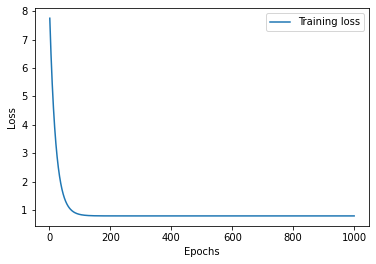

In [228]:
epochs = np.arange(1, epochs+1)
plt.plot(epochs, cost, label='Training loss')
#plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Step 5. Test the model

In [229]:
x_arr = torch.arange(-2, 2, 0.1) # test data
x_arr = torch.unsqueeze(x_arr, dim=1)

with torch.no_grad():
  y_pred = model(x_test)  # predicted output
  y_arr = model(x_arr)  # predicted output

### Plot the Regression Results

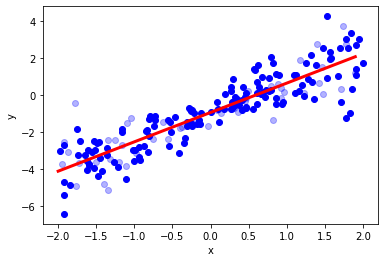

In [230]:
plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)

plt.plot(x_arr, y_arr, '-r', lw=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()